In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [ ]:
# reading csv files
#dataset =  pd.read_csv('house.data', sep=",")
#dataset.head

In [ ]:
# reading csv files
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv('data_diabet 2.csv', names=feature_cols)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#from pandas_profiling import ProfileReport
#import pandas as pd

#prof = ProfileReport(data)
#prof
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


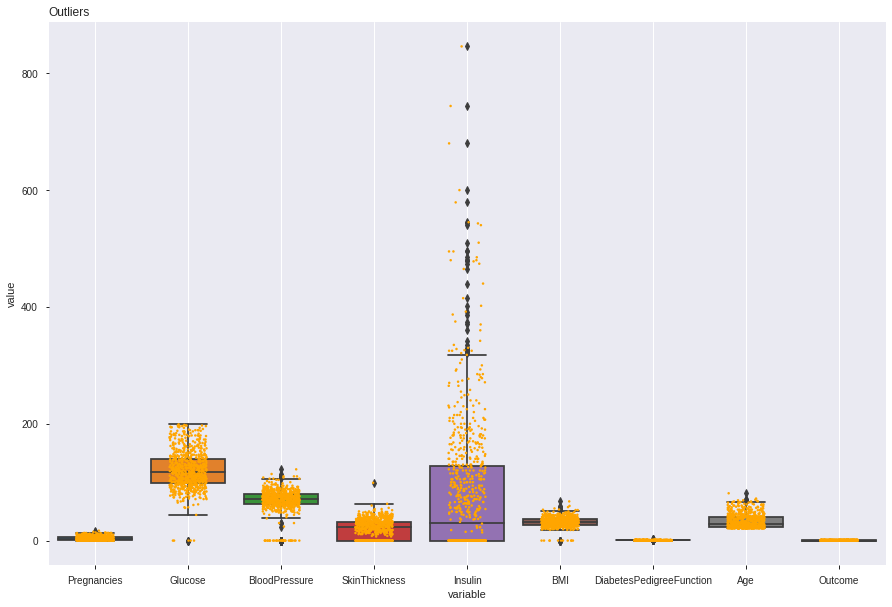

In [ ]:
# Visualisasikan setiap kolom -> detection of outliers
plt.figure(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(data))
sns.stripplot(x="variable", y="value", data=pd.melt(data), color="orange", jitter=0.2, size=2.5)
plt.title("Outliers", loc="left")
plt.grid()

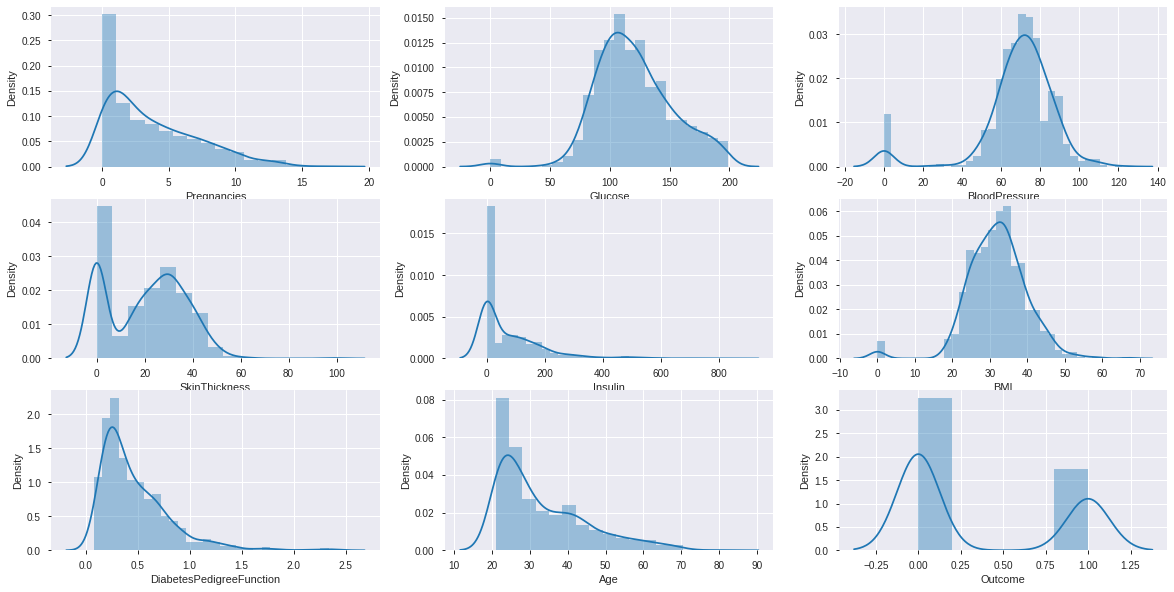

In [ ]:
# Plot density of each column
import warnings
warnings.filterwarnings("ignore")

a=1
plt.figure(figsize=(20, 10))
for i in data.columns:
    plt.subplot(3, 3, a)
    sns.distplot(data[i])
    a += 1
plt.show()

In [ ]:
# Outlier handling when features are normally or approximatelx normally distributed
def Z_Score_outlier_handling(column):
    upper_limit = data[column].mean() + 3*data[column].std()
    lower_limit = data[column].mean() - 3*data[column].std()
    data[column] = np.where(
        data[column] > upper_limit, upper_limit,
        np.where(data[column] < lower_limit, lower_limit, 
        data[column])
    )

# Outlier handling when features are skewed
def IQR_outlier_handling(column):
    percentile25 = data[column].quantile(0.25)
    percentile75 = data[column].quantile(0.75)
    iqr = percentile75-percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    data[data[column] > upper_limit]
    data[data[column] < lower_limit]
    
    new_df = data[data[column] < upper_limit]
    new_df.shape
    
    data[column] = np.where(
    data[column] > upper_limit,
    upper_limit,
    np.where(
        data[column] < lower_limit,
        lower_limit,
        data[column]
        )
    )

In [ ]:
# Outlier treatment by column
Z_Score_outlier_handling("Glucose")
Z_Score_outlier_handling("BloodPressure")
Z_Score_outlier_handling("SkinThickness")
Z_Score_outlier_handling("BMI")

IQR_outlier_handling("Pregnancies")
IQR_outlier_handling("Insulin")
IQR_outlier_handling("DiabetesPedigreeFunction")
IQR_outlier_handling("Age")

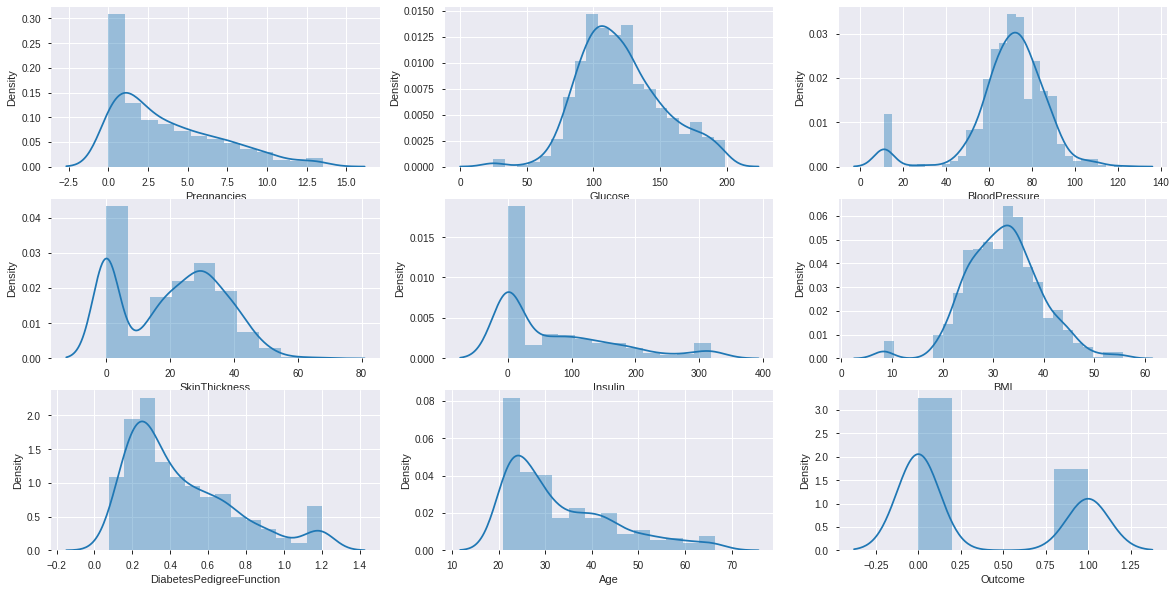

In [ ]:
# # Plot density of each column after outlierhandling
a=1
plt.figure(figsize=(20, 10))
for i in data.columns:
    plt.subplot(3, 3, a)
    sns.distplot(data[i])
    a += 1
plt.show()

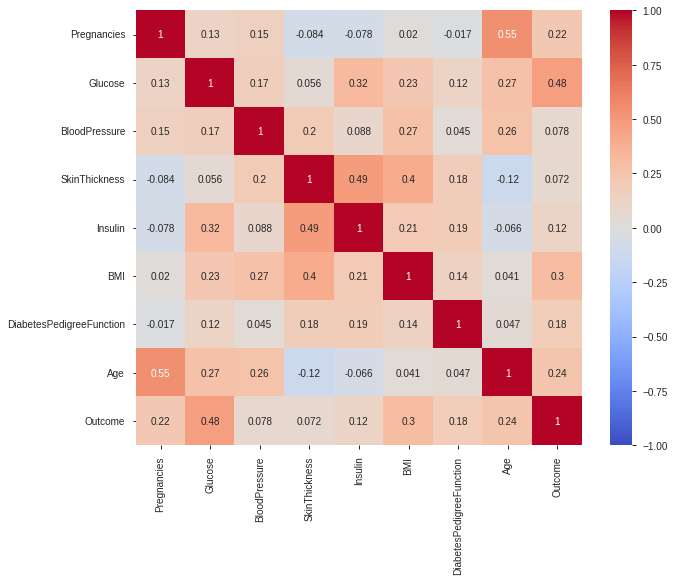

In [ ]:
# Visualize correlations of each column (not necessary but for interest)
correlations = data.corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, vmin= -1, cmap="coolwarm", annot=True)

In [ ]:
# Split X and Y and Train and Test Set
x = data.drop(columns=["Outcome"])
y = data["Outcome"]

# Show distribution of 0 and 1
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Fix distribution to make model more accurate (optional)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
# Split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

# Create empty list and append each model to list
models = []
models.append(("SVC", SVC(random_state=14)))
models.append(("SVM", LinearSVC(random_state=14)))
models.append(("LOGR", LogisticRegression(solver="liblinear", random_state=14)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier(random_state=14)))
models.append(("NB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier(random_state=14)))
models.append(("RF", RandomForestClassifier(random_state=14)))
models.append(("ET", ExtraTreesClassifier(random_state=14)))
models.append(("GB", GradientBoostingClassifier(random_state=14)))
models.append(("BC", BaggingClassifier(random_state=14)))

# Empty lsit for results of the evaluation
model_results = []

In [ ]:
# Function: for each element in model list there will be an evaluation -> Results will be added to results df
def train_all_models(models):
    i = 1
    plt.figure(figsize=(25, 15))
    for method, model in models:
        model.fit(x_train, y_train)
        test_pred = model.predict(x_test)

        f_score = model.score(x_test, y_test)
        model_results.append((method, f_score))

        plt.subplot(3, 4, i)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Greens")
        plt.title(model, fontsize=14)
        plt.xlabel('Test', fontsize=12)
        plt.ylabel('Predict', fontsize=12)
        df = pd.DataFrame(model_results).transpose()
        i+=1

# Show confusion matrix for each trained model 
    plt.show()
    df = pd.DataFrame(model_results)
    return df

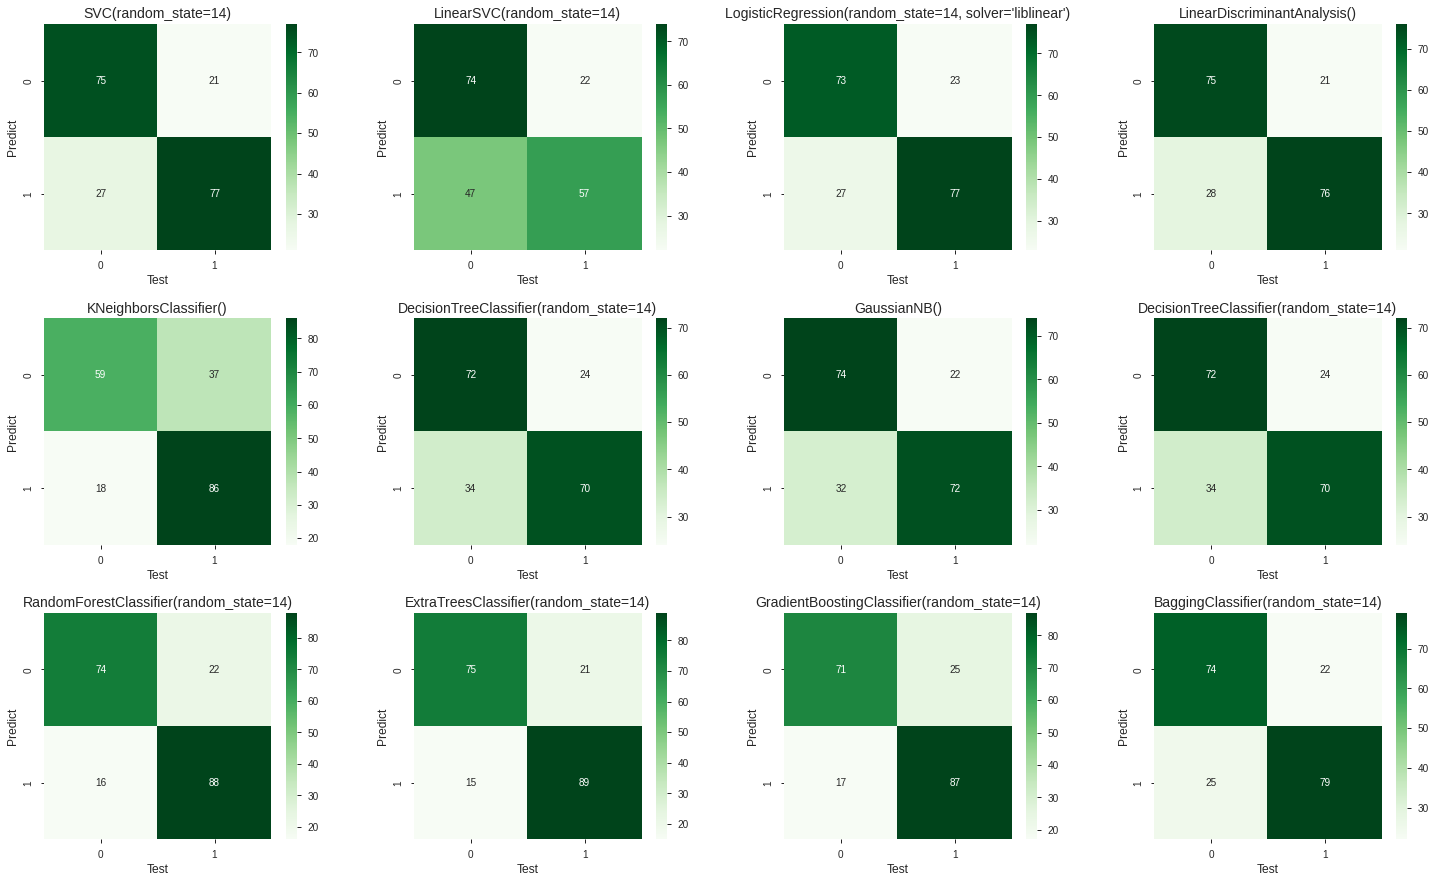

In [ ]:
# Sort results df for later visualizations    
best_models = train_all_models(models)
best_models = best_models.sort_values([1], ascending=False)

In [ ]:
best_models

,0,1
21,ET,0.820
9,ET,0.820
8,RF,0.810
20,RF,0.810
22,GB,0.790
10,GB,0.790
23,BC,0.765
11,BC,0.765
0,SVC,0.760
12,SVC,0.760


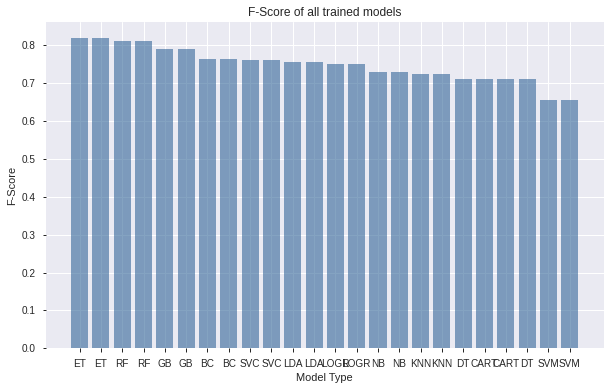

In [ ]:
# Visualize results in a bar chart
y_pos = np.arange(len(best_models[0]))
plt.figure(figsize=(10, 6))
plt.bar(y_pos, best_models[1], color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, best_models[0])
plt.title('F-Score of all trained models')
plt.xlabel('Model Type')
plt.ylabel('F-Score')
plt.show()

In [ ]:
best_model = ExtraTreesClassifier(max_depth=179, max_features=3, n_estimators=71, random_state=20)
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)

print(f"Classification report\n {classification_report(pred, y_test)}")
print(f"Score = {best_model.score(x_test,y_test)}")

Classification report
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        90
           1       0.88      0.83      0.85       110

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

Score = 0.84
